In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [6]:
# Sample dataset
data = {
    'Feature1': [5.1, 4.9, 4.7, 6.5, 5.8, 6.0, 7.2, 6.9, 6.7, 5.6],
    'Feature2': [3.5, 3.0, 3.2, 3.0, 2.7, 2.7, 3.6, 3.1, 3.1, 3.0]
}
df = pd.DataFrame(data)

In [7]:
# Feature scaling (optional but recommended for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Generate the linkage matrix using Ward's method
Z = linkage(scaled_features, method='ward')

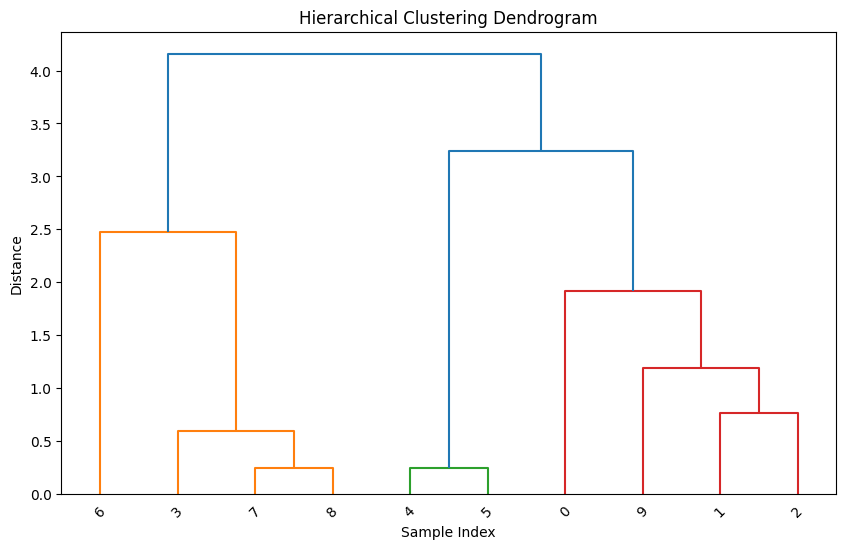

In [8]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=45, leaf_font_size=10)
plt.show()

In [9]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')

df['Cluster'] = clusters
print(df)

   Feature1  Feature2  Cluster
0       5.1       3.5        3
1       4.9       3.0        3
2       4.7       3.2        3
3       6.5       3.0        1
4       5.8       2.7        2
5       6.0       2.7        2
6       7.2       3.6        1
7       6.9       3.1        1
8       6.7       3.1        1
9       5.6       3.0        3


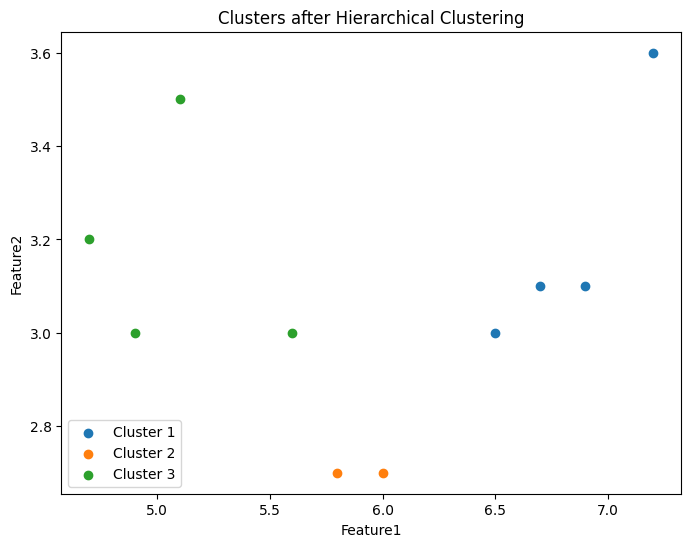

In [10]:
# Visualize clusters
plt.figure(figsize=(8,6))
for cluster in set(clusters):
    plt.scatter(df.loc[df['Cluster'] == cluster, 'Feature1'],
                df.loc[df['Cluster'] == cluster, 'Feature2'], label=f'Cluster {cluster}')
plt.title('Clusters after Hierarchical Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [11]:
import numpy as np

# Calculate cluster centroids in scaled feature space
centroids = []
for cluster_id in set(clusters):
    cluster_points = scaled_features[clusters == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# New input (replace with your test point)
new_input = np.array([[6.0, 3.0]])

# Scale the new input using the same scaler
new_input_scaled = scaler.transform(new_input)

# Compute Euclidean distances from new input to each centroid
distances = np.linalg.norm(centroids - new_input_scaled, axis=1)

# Find nearest cluster centroid
nearest_cluster = np.argmin(distances) + 1  # +1 because cluster labels start at 1

print(f'The new input {new_input[0]} belongs to cluster {nearest_cluster}')

The new input [6. 3.] belongs to cluster 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
